# Image Collection for Eye Diagnostic

Source: https://www.kaggle.com/koshirosato/cataract-classification-with-two-retina-datasets/data

In [4]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import pandas as pd
import os.path as path

We read the csv file in order to know more about the dataset

In [5]:
df = pd.read_csv("full_df.csv")

In [6]:
df.shape

(6392, 19)

In [32]:
df.sample(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
1655,2485,56,Female,2485_left.jpg,2485_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2485_right.jpg
3238,51,60,Male,51_left.jpg,51_right.jpg,normal fundus,epiretinal membrane over the macula,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",51_left.jpg
1637,2463,41,Female,2463_left.jpg,2463_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2463_right.jpg
6253,4527,49,Male,4527_left.jpg,4527_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4527_left.jpg
5560,3260,57,Female,3260_left.jpg,3260_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3260_left.jpg
57,71,56,Female,71_left.jpg,71_right.jpg,diabetic retinopathy,wet age-related macular degeneration，diabetic ...,0,1,0,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",71_right.jpg
1591,2412,60,Female,2412_left.jpg,2412_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2412_right.jpg
5448,3139,54,Female,3139_left.jpg,3139_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3139_left.jpg
6173,4424,41,Male,4424_left.jpg,4424_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4424_left.jpg
2624,4028,77,Male,4028_left.jpg,4028_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4028_right.jpg


## Grouping pictures by Disease

- Normal (N),
- Diabetes (D),
- Glaucoma (G),
- Cataract (C),
- AMD (A),
- Hypertension (H),
- Myopia (M),
- Other diseases/abnormalities (O)

#### We are only focusing on Cataracts, Glaucoma, Myopia, Normal, and Diabetes.

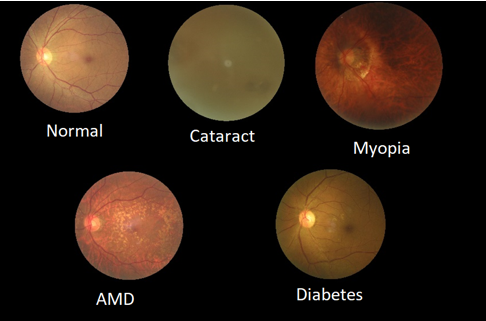

### *BEFORE STARTING TO GET OUR FILES SORTED OUT* We need to duplicate our image dataset folder as many times as every eye and disease, because a right eye can have both cataract and retinopathy.

## Do not mind the path namming if all of them are called *Cataract_images_#* I have duplicate the same source folder many times.

### The image data set of diseases and normal eye picture are mixed together, so we need to sort them by disease.

### 1. Cataract Left Eye

We create a new dataframe where the column "Left-Diagnostic Keywords" has the word cataract, so we can get all the filenames
that are in fact pictures of a left eye with cataract.

In [8]:
Cataract_left = df[df['Left-Diagnostic Keywords'].str.contains('cataract')]

In [9]:
Cataract_left.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
65,81,66,Male,81_left.jpg,81_right.jpg,moderate non proliferative retinopathy，cataract,moderate non proliferative retinopathy，cataract,0,1,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",81_right.jpg
86,103,55,Female,103_left.jpg,103_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",103_right.jpg
100,119,59,Male,119_left.jpg,119_right.jpg,cataract,drusen,0,0,0,1,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",119_right.jpg
218,254,60,Female,254_left.jpg,254_right.jpg,cataract,macular epiretinal membrane,0,0,0,1,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",254_right.jpg


### For Loop that iterates through our Cataract_left dataset

This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [15]:
for i in Cataract_left['Left-Fundus']:
    if path.exists(f"./Cataract_images_3/{i}"):
        try:
            shutil.move(f"./Cataract_images_3/{i}",f"./Cataract_left/{i}")
        except:
            continue

### 2. Cataract Right Eye

We create a new dataframe where the column "Right-Diagnostic Keywords" has the word cataract, so we can get all the filenames
that are in fact pictures of a right eye with cataract.

In [16]:
Cataract_right = df[df['Right-Diagnostic Keywords'].str.contains('cataract')]

In [17]:
Cataract_right.sample(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
1448,2178,84,Male,2178_left.jpg,2178_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2178_right.jpg
4654,2194,50,Male,2194_left.jpg,2194_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2194_left.jpg
4686,2229,59,Female,2229_left.jpg,2229_right.jpg,cataract，lens dust,lens dust，cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2229_left.jpg
4337,1460,62,Female,1460_left.jpg,1460_right.jpg,normal fundus,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1460_left.jpg
4645,2183,47,Female,2183_left.jpg,2183_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2183_left.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [18]:
for i in Cataract_right['Right-Fundus']:
    if path.exists(f"./Cataract_images_4/{i}"):
        try:
            shutil.move(f"./Cataract_images_4/{i}",f"./Cataract_right/{i}")
        except:
            continue

### 3. Glaucoma Left Eye

We create a new dataframe where the column "Left-Diagnostic Keywords" has the word glaucoma, so we can get all the filenames
that are in fact pictures of a left eye with glaucoma.

In [10]:
Glaucoma_left = df[df['Left-Diagnostic Keywords'].str.contains('glaucoma')]

In [11]:
Glaucoma_left.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
78,95,46,Male,95_left.jpg,95_right.jpg,suspected glaucoma,hypertensive retinopathy,0,0,1,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",95_right.jpg
129,153,79,Male,153_left.jpg,153_right.jpg,glaucoma,dry age-related macular degeneration,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",153_right.jpg
141,167,71,Male,167_left.jpg,167_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",167_right.jpg
150,178,54,Male,178_left.jpg,178_right.jpg,dry age-related macular degeneration，glaucoma,dry age-related macular degeneration,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",178_right.jpg
212,247,49,Male,247_left.jpg,247_right.jpg,dry age-related macular degeneration，glaucoma,dry age-related macular degeneration，glaucoma,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",247_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [12]:
for i in Glaucoma_left['Left-Fundus']:
    if path.exists(f"./Cataract_images_5/{i}"):
        try:
            shutil.move(f"./Cataract_images_5/{i}",f"./Glaucoma_left/{i}")
        except:
            continue

### 4. Glaucoma Right Eye

We create a new dataframe where the column "Right-Diagnostic Keywords" has the word glaucoma, so we can get all the filenames
that are in fact pictures of a right eye with glaucoma.

In [13]:
Glaucoma_right = df[df['Right-Diagnostic Keywords'].str.contains('glaucoma')]

In [14]:
Glaucoma_right.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
34,43,35,Male,43_left.jpg,43_right.jpg,wet age-related macular degeneration,dry age-related macular degeneration，glaucoma,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",43_right.jpg
141,167,71,Male,167_left.jpg,167_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",167_right.jpg
205,238,70,Male,238_left.jpg,238_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration，glaucoma,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",238_right.jpg
212,247,49,Male,247_left.jpg,247_right.jpg,dry age-related macular degeneration，glaucoma,dry age-related macular degeneration，glaucoma,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",247_right.jpg
319,365,60,Female,365_left.jpg,365_right.jpg,hypertensive retinopathy，suspected glaucoma,hypertensive retinopathy，suspected glaucoma,0,0,1,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",365_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [15]:
for i in Glaucoma_right['Right-Fundus']:
    if path.exists(f"./Cataract_images_6/{i}"):
        try:
            shutil.move(f"./Cataract_images_6/{i}",f"./Glaucoma_right/{i}")
        except:
            continue

### 5. Myopia Left Eye

We create a new dataframe where the column "Left-Diagnostic Keywords" has the word myopia, so we can get all the filenames
that are in fact pictures of a left eye with myopia.

In [20]:
Myopia_left = df[df['Left-Diagnostic Keywords'].str.contains('myopia')]

In [21]:
Myopia_left.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
11,13,60,Female,13_left.jpg,13_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",13_right.jpg
16,18,58,Male,18_left.jpg,18_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",18_right.jpg
29,35,68,Female,35_left.jpg,35_right.jpg,pathological myopia,normal fundus,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",35_right.jpg
88,106,57,Female,106_left.jpg,106_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",106_right.jpg
122,144,49,Female,144_left.jpg,144_right.jpg,pathological myopia,normal fundus,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",144_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [23]:
for i in Myopia_left['Left-Fundus']:
    if path.exists(f"./Cataract_images_8/{i}"):
        try:
            shutil.move(f"./Cataract_images_8/{i}",f"./Myopia_left/{i}")
        except:
            continue

### 6. Myopia Right Eye

We create a new dataframe where the column "Right-Diagnostic Keywords" has the word myopia, so we can get all the filenames that are in fact pictures of a right eye with myopia.

In [24]:
Myopia_right = df[df['Right-Diagnostic Keywords'].str.contains('myopia')]

In [25]:
Myopia_right.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
11,13,60,Female,13_left.jpg,13_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",13_right.jpg
14,16,54,Female,16_left.jpg,16_right.jpg,normal fundus,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",16_right.jpg
16,18,58,Male,18_left.jpg,18_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",18_right.jpg
37,46,66,Male,46_left.jpg,46_right.jpg,moderate non proliferative retinopathy,pathological myopia,0,1,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",46_right.jpg
45,54,66,Female,54_left.jpg,54_right.jpg,normal fundus,moderate non proliferative retinopathy，patholo...,0,1,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",54_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [29]:
for i in Myopia_right['Right-Fundus']:
    if path.exists(f"./Cataract_images_9/{i}"):
        try:
            shutil.move(f"./Cataract_images_9/{i}",f"./Myopia_right/{i}")
        except:
            continue

### 7. Retinopathy Left Eye

We create a new dataframe where the column "Left-Diagnostic Keywords" has the word retinopathy, so we can get all the filenames
that are in fact pictures of a left eye with retinopathy.

In [35]:
Retinopathy_left = df[df['Left-Diagnostic Keywords'].str.contains('retinopathy')]

In [36]:
Retinopathy_left.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
10,11,60,Female,11_left.jpg,11_right.jpg,moderate non proliferative retinopathy，hyperte...,moderate non proliferative retinopathy，hyperte...,0,1,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",11_right.jpg
17,19,45,Male,19_left.jpg,19_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",19_right.jpg
19,23,47,Male,23_left.jpg,23_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",23_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [38]:
for i in Retinopathy_left['Left-Fundus']:
    if path.exists(f"./Cataract_images_10/{i}"):
        try:
            shutil.move(f"./Cataract_images_10/{i}",f"./Retinopathy_left/{i}")
        except:
            continue

### 8. Retinopathy Right Eye

We create a new dataframe where the column "Right-Diagnostic Keywords" has the word retinopathy, so we can get all the filenames
that are in fact pictures of a right eye with retinopathy.

In [39]:
Retinopathy_right = df[df['Right-Diagnostic Keywords'].str.contains('retinopathy')]

In [40]:
Retinopathy_right.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [41]:
for i in Retinopathy_right['Right-Fundus']:
    if path.exists(f"./Cataract_images_11/{i}"):
        try:
            shutil.move(f"./Cataract_images_11/{i}",f"./Retinopathy_right/{i}")
        except:
            continue

### 9. Normal Left Eye

We create a new dataframe where the column "Left-Diagnostic Keywords" has the word normal fundus, so we can get all the filenames
that are in fact pictures of a left normal eye.

In [42]:
normal_left = df[df['Left-Diagnostic Keywords'].str.contains('normal fundus')]

In [43]:
normal_left.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
12,14,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",14_right.jpg
13,15,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",15_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [45]:
for i in normal_left['Left-Fundus']:
    if path.exists(f"./Cataract_images_12/{i}"):
        try:
            shutil.move(f"./Cataract_images_12/{i}",f"./normal_left/{i}")
        except:
            continue

### 10. Normal Right Eye

We create a new dataframe where the column "Right-Diagnostic Keywords" has the word normal fundus, so we can get all the filenames
that are in fact pictures of a right normal eye.

In [46]:
normal_right = df[df['Right-Diagnostic Keywords'].str.contains('normal fundus')]

In [51]:
normal_right.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg
24,29,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",29_right.jpg


This loop will first check if the path exist with the OS libray, and then it would rename the path of the picture to an specific folder.

In [49]:
for i in normal_right['Right-Fundus']:
    if path.exists(f"./Cataract_images_13/{i}"):
        try:
            shutil.move(f"./Cataract_images_13/{i}",f"./normal_right/{i}")
        except:
            continue

### Double checking my work

In [53]:
df[df['filename'] == '108_right.jpg']

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
90,108,54,Female,108_left.jpg,108_right.jpg,retinal pigment epithelium atrophy，diabetic re...,normal fundus,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",108_right.jpg


### After we took care of all the images and sorting them out. We need to delete the non necessary folder fill with non classified images.

In [55]:
shutil.rmtree("./Cataract_images_9")

In [56]:
shutil.rmtree("./Cataract_images_3")

In [57]:
shutil.rmtree("./Cataract_images_4")

In [58]:
shutil.rmtree("./Cataract_images_5")

In [59]:
shutil.rmtree("./Cataract_images_6")

In [60]:
shutil.rmtree("./Cataract_images_8")

In [61]:
shutil.rmtree("./Cataract_images_10")

In [62]:
shutil.rmtree("./Cataract_images_11")

In [63]:
shutil.rmtree("./Cataract_images_12")

In [64]:
shutil.rmtree("./Cataract_images_13")

We used the shutil library function calle remove tree that deletes a folder and all its contents